In [1]:
import pandas as pd 

In [2]:
import statistics

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
# it contains classification results 
filenames = ["results/result_2019-12-10_18-46-11/classification_AAUP_results.csv", 
             "results/result_2019-12-10_18-46-11/classification_Cities_results.csv", 
             "results/result_2019-12-10_18-46-11/classification_Forbes_results.csv", 
             "results/result_2019-12-10_18-46-11/classification_MetacriticMovies_results.csv", 
             "results/result_2019-12-10_18-46-11/classification_MetacriticAlbums_results.csv"]

In [6]:
data = pd.DataFrame()
for filename in filenames:
    curr_data = pd.read_csv(filename, keep_default_na=False)
    frames = [data, curr_data]
    data = pd.concat(frames)

In [7]:
data.head()

,task_name,gold_standard_file,model_name,model_configuration,accuracy
0,Classification,AAUP,KNN,K=3,0.643696
1,Classification,AAUP,KNN,K=3,0.629621
2,Classification,AAUP,KNN,K=3,0.638131
3,Classification,AAUP,KNN,K=3,0.633973
4,Classification,AAUP,KNN,K=3,0.632804


In [8]:
# the best method in managing any file used as gold standard
best_result = data[data.accuracy==max(data.accuracy)]

In [9]:
best_result

,task_name,gold_standard_file,model_name,model_configuration,accuracy
83,Classification,MetacriticMovies,SVM,C=10.0,0.815581


In [10]:
# the worst method in working with any file used as gold standard
worst_result = data[data.accuracy==min(data.accuracy)]

In [11]:
worst_result

,task_name,gold_standard_file,model_name,model_configuration,accuracy
30,Classification,Forbes,SVM,C=0.001,0.488854
31,Classification,Forbes,SVM,C=0.01,0.488854
32,Classification,Forbes,SVM,C=0.1,0.488854
37,Classification,Forbes,SVM,C=0.001,0.488854
38,Classification,Forbes,SVM,C=0.01,0.488854
39,Classification,Forbes,SVM,C=0.1,0.488854
44,Classification,Forbes,SVM,C=0.001,0.488854
45,Classification,Forbes,SVM,C=0.01,0.488854
46,Classification,Forbes,SVM,C=0.1,0.488854
51,Classification,Forbes,SVM,C=0.001,0.488854


In [12]:
gold_standard = data.gold_standard_file.unique()

In [13]:
models_df = pd.DataFrame([], columns=['file', 'id', 'approach', 'conf', 'min', 'max', 'mean', 'standard_dev'])

In [14]:
# it calculates the min, max, average and standard deviation for each model and, if more configuration are tested, for each conf
for file in gold_standard:
    gold_standard_data = data[data['gold_standard_file']==file]
    models = gold_standard_data.model_name.unique()
    
    for m in models:
        model_data = gold_standard_data[gold_standard_data['model_name']==m]
        model_configurations = model_data.model_configuration.unique()

        if len(model_configurations)>1:
            max_accuracy = max(model_data['accuracy'])
            best_conf = model_data[model_data['accuracy']==max_accuracy].model_configuration.values[0]
            best_conf_df = model_data[model_data['model_configuration']==best_conf]
            
            model_id = m+' '+best_conf
            
            model_accuracy = best_conf_df.accuracy
            min_accuracy = min(model_accuracy)
            mean_accuracy = sum(model_accuracy)/len(model_accuracy)
            stdev_accuracy = statistics.stdev(model_accuracy)
            
            values = {'file': file, 'id' : model_id, 'approach' : m, 'conf' : conf, 'min':min_accuracy, 'max':max_accuracy, 'mean':mean_accuracy, 'standard_dev':stdev_accuracy}
            models_df = models_df.append(values, ignore_index=True)

        else:
            conf = model_configurations[0]

            model_accuracy = model_data.accuracy
            min_accuracy = min(model_accuracy)
            max_accuracy = max(model_accuracy)
            mean_accuracy = sum(model_accuracy)/len(model_accuracy)
            stdev_accuracy = statistics.stdev(model_accuracy)
            model_id = m+' '+conf

            values = {'file': file, 'id' : model_id, 'approach' : m, 'conf' : conf, 'min':min_accuracy, 'max':max_accuracy, 'mean':mean_accuracy, 'standard_dev':stdev_accuracy}
            models_df = models_df.append(values, ignore_index=True)   

In [15]:
models_df

,file,id,approach,conf,min,max,mean,standard_dev
0,AAUP,KNN K=3,KNN,K=3,0.629621,0.643980,0.637196,0.004761
1,AAUP,C45,C45,,0.528502,0.571957,0.555628,0.013034
2,AAUP,NB,NB,,0.582938,0.591222,0.587488,0.003074
3,AAUP,SVM C=10.0,SVM,,0.697154,0.713471,0.707585,0.005685
4,Cities,KNN K=3,KNN,K=3,0.714263,0.765334,0.739503,0.016674
5,Cities,C45,C45,,0.533652,0.596047,0.566487,0.019790
6,Cities,NB,NB,,0.770460,0.801401,0.785259,0.009429
7,Cities,SVM C=10.0,SVM,,0.755890,0.800182,0.780964,0.014224
8,Forbes,KNN K=3,KNN,K=3,0.552224,0.575147,0.565585,0.008530
9,Forbes,C45,C45,,0.495861,0.529183,0.509876,0.011976


Text(0, 0.5, 'Mean value')

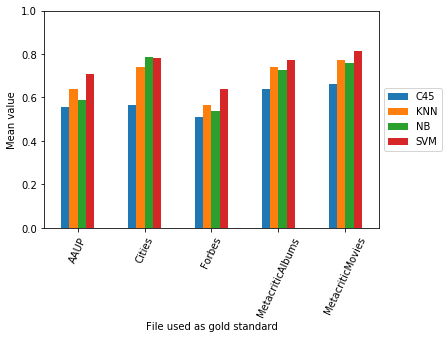

In [16]:
comparison_plot = models_df.pivot(index='file', columns='approach', values='mean').plot(kind='bar')
comparison_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim((0,1))
plt.xticks(rotation=65)
plt.xlabel('File used as gold standard')
plt.ylabel('Mean value')

Text(0, 0.5, 'The best value (max)')

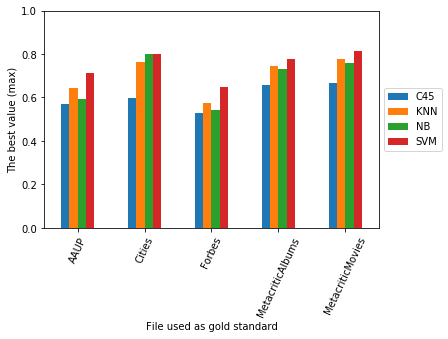

In [17]:
comparison_plot = models_df.pivot(index='file', columns='approach', values='max').plot(kind='bar')
comparison_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim((0,1))
plt.xticks(rotation=65)
plt.xlabel('File used as gold standard')
plt.ylabel('The best value (max)')